In this workshop we are goin to work with the dataset of the UPM researchers and their publications. This dataset is composed by two files. These files are an extended versión of the csv that we used in the web application workshops.

Our goal is obtain as much information as we can from this dataset. We will achieve this in two ways: we will answer questions with numeric values (e.g. what is the average number publications of an UPM reaearcher? or, how many citations have the reseachers, suming all their publications?) or we will generate some charts to present information in a visual way (e.g. how is the relation between the publication year of a paper and its number of citations? or, how is the histogram of the number of publications by researcher?)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
publications = pd.read_pickle("publications")
researchers = pd.read_pickle("researchers")


In [2]:
researchers

,auth_id,name,last_name,citations,cited_by,publications,orcid
0,7005227142,José Antonio,Cobos,5267.0,3940.0,343.0,NaN
1,55708653400,Javier,LLorca,9830.0,6350.0,301.0,NaN
2,7007057622,Manuel,Elices,8251.0,4563.0,285.0,NaN
3,6701646524,Marcela G.,González-Gross,7167.0,5244.0,280.0,NaN
4,8899577600,Javier,Bajo,2213.0,1376.0,271.0,0000-0003-0824-4133
...,...,...,...,...,...,...,...
7170,57204035481,Miguel Á,Ruano Hernansanz,0.0,0.0,1.0,NaN
7171,57201215949,A.,Toribio,8.0,8.0,1.0,NaN
7172,57190576447,Noemi García,Arjona,1.0,1.0,1.0,NaN
7173,57202283310,Victor,Aparicio Mequiades,1.0,1.0,1.0,NaN


# Dataset exploration
Any project related with data analysis starts with a study of the data itself: 
* What kind of data do we have?
* How is it organized? How many columns have each dataframe?
* Are there wrong or missing values?
* What does each value of a column means? How many different values are in each column?

With the examples we saw in the previous workshop try to answer that questions.

In [3]:
researchers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7175 entries, 0 to 7174
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   auth_id       7175 non-null   int64  
 1   name          7170 non-null   object 
 2   last_name     7175 non-null   object 
 3   citations     7174 non-null   float64
 4   cited_by      7175 non-null   float64
 5   publications  7173 non-null   float64
 6   orcid         616 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 392.5+ KB


In [4]:
researchers.describe()

,auth_id,citations,cited_by,publications
count,7.175000e+03,7174.000000,7175.000000,7173.000000
mean,4.233308e+10,100.549902,78.590430,8.809703
std,2.045068e+10,406.214383,292.216692,20.705277
min,6.503849e+09,-10.000000,0.000000,0.000000
25%,2.407418e+10,1.000000,1.000000,1.000000
50%,5.625455e+10,7.000000,6.000000,2.000000
75%,5.719483e+10,42.000000,37.000000,7.000000
max,5.720871e+10,9830.000000,6761.000000,343.000000


In [5]:
researchers.name.unique()[:30]

array(['José Antonio', 'Javier', 'Manuel', 'Marcela G.', 'Shalom',
       'Juan C.', 'Óscar G.', 'Pedro', 'Pablo', 'Óscar', 'Javier D.',
       'José Manuel', 'Paolo P.', 'Alexander N.', 'Andres',
       'María Teresa', 'Asunción', 'Jesús Ángel', 'J. L.', 'Francisco',
       'Miguel Ángel', 'Concha', 'T.', 'Miguel A.', 'Enrique', 'Diego',
       'Carlos D.', 'Eduardo', 'José María', 'Ana María'], dtype=object)

In [5]:
publications

,pages,authors,title,document_id,date,journal,openaccess,cited_count,type
0,15.0,"[57204955584, 57200520067, 24922369500, 244382...",High-Efficiency High-Bandwidth Four-Quadrant F...,85058136304,2019-06-01,IEEE Journal of Emerging and Selected Topics i...,False,0.0,Article
1,8.0,"[7005227142, 57200519327, 57200511770, 2443825...",Energy-Buffered Single-Phase Inverter Operatin...,85060314395,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,2.0,Conference Paper
2,8.0,"[57200511770, 57200519327, 56249124100, 244382...",ZVS transitions in Multi-Mode Single Stage Inv...,85060302761,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,1.0,Conference Paper
3,5.0,"[57195619519, 57204116610, 24438258500, 700522...",Equivalent Parameters of Round and Litz Wire C...,85060302746,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,0.0,Conference Paper
4,6.0,"[57200519327, 57200511770, 24438258500, 562491...",Digital Variable Frequency Control of a Single...,85060299891,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,1.0,Conference Paper
...,...,...,...,...,...,...,...,...,...
35959,NaN,"[57191585506, 57195954471, 57195321188, 571921...",Nuclear data sensitivity and uncertainty asses...,85030469540,2017-09-13,EPJ Web of Conferences,True,0.0,Conference Paper
35960,13.0,"[57195323836, 57195323776, 57195321188, 571900...",Predictive value of serum infliximab levels at...,85027118255,2017-06-01,Open Rheumatology Journal,True,3.0,Article
35961,10.0,"[57206889833, 57195310042]",The [textile] materiality of jorn utzon's encl...,85062100903,2018-11-01,Rita Revista Indexada de Textos Academicos,True,0.0,Article
35962,8.0,"[57195305282, 57195310042]",Ernesto N. Rogers and the preesistenza ambient...,85026897732,2015-04-01,Rita Revista Indexada de Textos Academicos,True,0.0,Article


In [6]:
publications.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35964 entries, 0 to 35963
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pages        29764 non-null  float64       
 1   authors      35949 non-null  object        
 2   title        35953 non-null  object        
 3   document_id  35964 non-null  object        
 4   date         35952 non-null  datetime64[ns]
 5   journal      35768 non-null  object        
 6   openaccess   35964 non-null  bool          
 7   cited_count  35955 non-null  float64       
 8   type         35955 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), object(5)
memory usage: 2.5+ MB


In [8]:
publications.describe()

,pages,cited_count
count,2.976400e+04,35955.000000
mean,7.681272e+02,13.008260
std,1.177253e+05,38.461635
min,-1.255000e+07,0.000000
25%,6.000000e+00,1.000000
50%,9.000000e+00,4.000000
75%,1.300000e+01,13.000000
max,1.296919e+07,2406.000000


# Data cleaning
After a first view of the data and before to start working with it, we must clean it. This proccess is called preprocessing and it is crucial to be able to obtain good results. We will discard invalid data, fill missing values, drop redundant information, etc. We need to create a dataset with the following restrictions.
* All reserachers should have name, last_name and auth_id. All publications should have title, journal and document_id. Drop the rows that do not match this condition (check https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
* There are no duplicated publications (same title) or researchers (same name and lastname). To find duplicates check https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
* All numeric fields must be an integer number bigger or equal to 0. Replace missing values with 0, round decimal values
* For the rest of the fields, rows that contain incorrect values should be discarded

In [9]:
#Arreglar la fecha si usas el json
#publications.date = pd.to_datetime(publications.date*1e6)
#dice ns pero si *1e9 sale mal NaN
#en realidad esta en micro seg -> *1e6

In [17]:
#eliminando valores nulos

publications

,pages,authors,title,document_id,date,journal,openaccess,cited_count,type
0,15.0,"[57204955584, 57200520067, 24922369500, 244382...",High-Efficiency High-Bandwidth Four-Quadrant F...,85058136304,2019-06-01,IEEE Journal of Emerging and Selected Topics i...,False,0.0,Article
1,8.0,"[7005227142, 57200519327, 57200511770, 2443825...",Energy-Buffered Single-Phase Inverter Operatin...,85060314395,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,2.0,Conference Paper
2,8.0,"[57200511770, 57200519327, 56249124100, 244382...",ZVS transitions in Multi-Mode Single Stage Inv...,85060302761,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,1.0,Conference Paper
3,5.0,"[57195619519, 57204116610, 24438258500, 700522...",Equivalent Parameters of Round and Litz Wire C...,85060302746,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,0.0,Conference Paper
4,6.0,"[57200519327, 57200511770, 24438258500, 562491...",Digital Variable Frequency Control of a Single...,85060299891,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,1.0,Conference Paper
...,...,...,...,...,...,...,...,...,...
35959,0.0,"[57191585506, 57195954471, 57195321188, 571921...",Nuclear data sensitivity and uncertainty asses...,85030469540,2017-09-13,EPJ Web of Conferences,True,0.0,Conference Paper
35960,13.0,"[57195323836, 57195323776, 57195321188, 571900...",Predictive value of serum infliximab levels at...,85027118255,2017-06-01,Open Rheumatology Journal,True,3.0,Article
35961,10.0,"[57206889833, 57195310042]",The [textile] materiality of jorn utzon's encl...,85062100903,2018-11-01,Rita Revista Indexada de Textos Academicos,True,0.0,Article
35962,8.0,"[57195305282, 57195310042]",Ernesto N. Rogers and the preesistenza ambient...,85026897732,2015-04-01,Rita Revista Indexada de Textos Academicos,True,0.0,Article


In [18]:
#eliminando valores duplicados

print("caca")
publications.dropna(subset=["title"])


caca


,pages,authors,title,document_id,date,journal,openaccess,cited_count,type
0,15.0,"[57204955584, 57200520067, 24922369500, 244382...",High-Efficiency High-Bandwidth Four-Quadrant F...,85058136304,2019-06-01,IEEE Journal of Emerging and Selected Topics i...,False,0.0,Article
1,8.0,"[7005227142, 57200519327, 57200511770, 2443825...",Energy-Buffered Single-Phase Inverter Operatin...,85060314395,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,2.0,Conference Paper
2,8.0,"[57200511770, 57200519327, 56249124100, 244382...",ZVS transitions in Multi-Mode Single Stage Inv...,85060302761,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,1.0,Conference Paper
3,5.0,"[57195619519, 57204116610, 24438258500, 700522...",Equivalent Parameters of Round and Litz Wire C...,85060302746,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,0.0,Conference Paper
4,6.0,"[57200519327, 57200511770, 24438258500, 562491...",Digital Variable Frequency Control of a Single...,85060299891,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,1.0,Conference Paper
...,...,...,...,...,...,...,...,...,...
35959,0.0,"[57191585506, 57195954471, 57195321188, 571921...",Nuclear data sensitivity and uncertainty asses...,85030469540,2017-09-13,EPJ Web of Conferences,True,0.0,Conference Paper
35960,13.0,"[57195323836, 57195323776, 57195321188, 571900...",Predictive value of serum infliximab levels at...,85027118255,2017-06-01,Open Rheumatology Journal,True,3.0,Article
35961,10.0,"[57206889833, 57195310042]",The [textile] materiality of jorn utzon's encl...,85062100903,2018-11-01,Rita Revista Indexada de Textos Academicos,True,0.0,Article
35962,8.0,"[57195305282, 57195310042]",Ernesto N. Rogers and the preesistenza ambient...,85026897732,2015-04-01,Rita Revista Indexada de Textos Academicos,True,0.0,Article


In [13]:
#reemplazar nulos por ceros
publications.pages = publications.pages.fillna(0)
publications.cited_count = publications.cited_count.fillna(0)

researchers.citations = researchers.citations.fillna(0)
researchers.publications = researchers.publications.fillna(0)

In [14]:
#descartar valores negativos
publications = publications[publications.pages>=0]
researchers = researchers[researchers.citations>=0]

In [14]:
#redondear decimales
def to_int(x):
    return int(x+0.5)
publications.pages = publications.pages.apply(to_int)
publications.cited_count = publications.cited_count.apply(to_int)

researchers.citations = researchers.citations.apply(to_int)
researchers.cited_by = researchers.cited_by.apply(to_int)
researchers.publications = researchers.publications.apply(to_int)

In [15]:
#eliminar errores
publications = publications[publications.pages<=200]

# Data analytics

Once we know about the data we are using and we have cleaned it, we need to ask what kind of useful information we can extract from that data. It is a good idea to make a kind of brainstorming of possible questions, then take the list of resulting questions and sort them by their difficulty, finally begin to answer them starting by the easiest ones.

Yoy may need to use a joined dataset to answer some questions

In [16]:
# This operation creates a dataset combining researchers and publications producing a dataset with one row for each
# combination of researcher-publication in which the researcher is one of the authors of the publication
data = researchers.merge(publications.rename(columns={"authors":"auth_id"}).explode("auth_id"), on="auth_id")

In [17]:
data

,auth_id,name,last_name,citations,cited_by,publications,orcid,pages,title,document_id,date,journal,openaccess,cited_count,type
0,7005227142,José Antonio,Cobos,5267,3940,343,NaN,15,High-Efficiency High-Bandwidth Four-Quadrant F...,85058136304,2019-06-01,IEEE Journal of Emerging and Selected Topics i...,False,0,Article
1,7005227142,José Antonio,Cobos,5267,3940,343,NaN,8,Energy-Buffered Single-Phase Inverter Operatin...,85060314395,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,2,Conference Paper
2,7005227142,José Antonio,Cobos,5267,3940,343,NaN,8,ZVS transitions in Multi-Mode Single Stage Inv...,85060302761,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,1,Conference Paper
3,7005227142,José Antonio,Cobos,5267,3940,343,NaN,5,Equivalent Parameters of Round and Litz Wire C...,85060302746,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,0,Conference Paper
4,7005227142,José Antonio,Cobos,5267,3940,343,NaN,6,Digital Variable Frequency Control of a Single...,85060299891,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,1,Conference Paper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59610,57201215949,A.,Toribio,8,8,1,NaN,7,Mechanical properties and adhesive behavior of...,85044000684,2018-08-01,International Journal of Adhesion and Adhesives,False,8,Article
59611,57190576447,Noemi García,Arjona,1,1,1,NaN,17,Proposals for improving assessment systems in ...,84981263415,2016-01-01,Journal of Technology and Science Education,True,1,Article
59612,57202283310,Victor,Aparicio Mequiades,1,1,1,NaN,11,Coherent Signal Processing for Traffic Flow Me...,85030762840,2018-06-15,IEEE Sensors Journal,False,1,Article
59613,38061551300,Juan,Mateos,17,17,2,NaN,6,Accelerated life test of high luminosity AlGaI...,84866732161,2012-09-01,Microelectronics Reliability,False,13,Article


## Basic results

Some of the esaiest question or more basic results we can obtain are the following:
* Numeric results
    * How many researchers are?
    * How many publications are?
    * How many of journals are?
    * How many types of publications are?
    * How many publications of each type are?
    * How many publications have each researcher in average? (Use only researchers dataset)
    * Which is the oldest publication?
    * Which is the publication with most citations?
    * Who is the researcher with more publications? (Use only researchers dataset)
    * How many researchers have ORCid?
* Graphic results
    * Histogram of the number of publications per researcher
    * Bar chart of the number of publications by type
    * Line chart of the number of publications per year

Som of those questions are just countings, sumations or rankings, but other need data aggregations with ``groupby``.

**Answer each question in a different cell of this notebook (remember that you can insert new cell from the Insert menu).**

In [18]:
#How many researchers are?
print("Hay {} investigadores".format(len(researchers)))

Hay 7056 investigadores


In [19]:
#How many publications are?
print("Hay " +str(len(publications))+" publicaciones")

Hay 35046 publicaciones


In [20]:
#How many publications are?
print("Hay {} publicaciones".format(len(publications)))

Hay 35046 publicaciones


In [21]:
#How many of journals are?
print("Hay {} revistas".format(len(publications.journal.unique())))

Hay 7793 revistas


In [22]:
#How many types of publications are?
print("Hay {} tipos".format(len(publications.type.unique())))

Hay 12 tipos


In [23]:
#How many publications of each type are?
publications.groupby("type")["document_id"].count()

type
Article             21494
Article in Press       84
Book                   25
Chapter               656
Conference Paper    11428
Editorial             275
Erratum                83
Letter                 69
Note                   99
Review                792
Short Survey           32
Name: document_id, dtype: int64

In [24]:
#How many publications have each researcher in average? (Use only researchers dataset)
researchers["publications"].mean()

8.907738095238095

In [25]:
#Which is the oldest publication?
min_date = publications.date.min()
publications[publications.date == min_date]

,pages,authors,title,document_id,date,journal,openaccess,cited_count,type
33538,16,"[24580537700, 6504371460, 55463179200]",Study of the impedance of a platinum electrode...,26744475991,1959-01-01,Electrochimica Acta,False,28,Article


In [26]:
#Which is the publication with most citations?
data.sort_values(by="citations", ascending=False)[:1]

,auth_id,name,last_name,citations,cited_by,publications,orcid,pages,title,document_id,date,journal,openaccess,cited_count,type
514,55708653400,Javier,LLorca,9830,6350,301,NaN,0,Proceedings of the 7th World Congress of Compu...,34250198327,2007-06-01,Modelling and Simulation in Materials Science ...,True,0,Editorial


In [27]:
#Who is the researcher with more publications? (Use only researchers dataset)
#researchers.sort_values(by="publications", ascending=False)[:1]
maxp = researchers.publications.max()
researchers[researchers.publications == maxp]

,auth_id,name,last_name,citations,cited_by,publications,orcid
0,7005227142,José Antonio,Cobos,5267,3940,343,NaN


In [28]:
#How many researchers have ORCid?
len(researchers) - researchers.orcid.isna().sum()

614

In [29]:
#gente sin orcid
researchers.orcid.isna().sum()
#tanto por uno de gente que tiene orcid
1 - researchers.orcid.isna().sum()/len(researchers)

0.08701814058956914

In [30]:
import numpy as np

[   0    1    2 ... 7053 7054 7055]
0       343
1       301
2       285
3       280
4       271
       ... 
7170      1
7171      1
7172      1
7173      1
7174      2
Name: publications, Length: 7056, dtype: int64


<BarContainer object of 7056 artists>

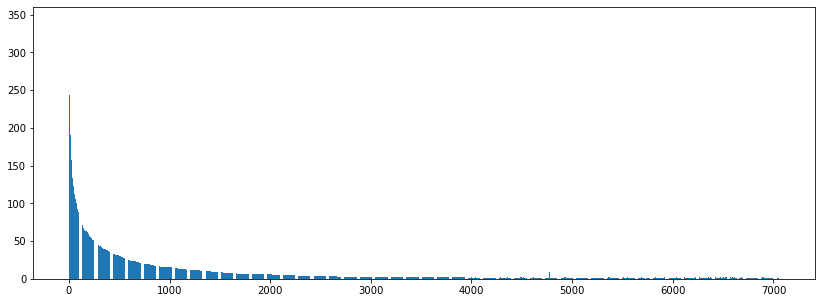

In [31]:
#Histogram of the number of publications per researcher
dx = np.arange(0, len(researchers), 1)
print(dx)
p = researchers["publications"]
print(p)
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(dx, p)

<BarContainer object of 11 artists>

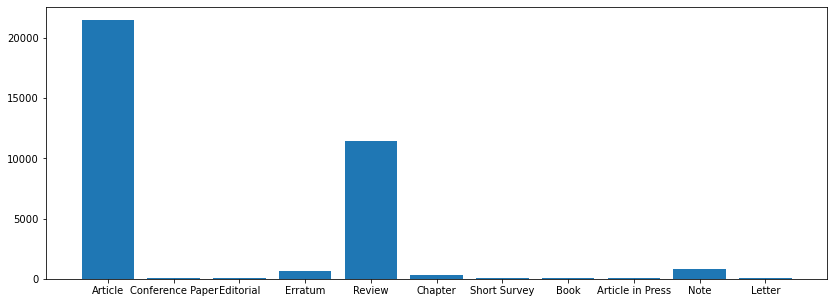

In [32]:
#Bar chart of the number of publications by type
ty = publications.type.unique()[:11]
p = publications.groupby("type")["document_id"].count()
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(ty, p)

In [33]:
#Line chart of the number of publications per year
publications["year"] = publications.date.dt.year

<AxesSubplot:xlabel='year', ylabel='document_id'>

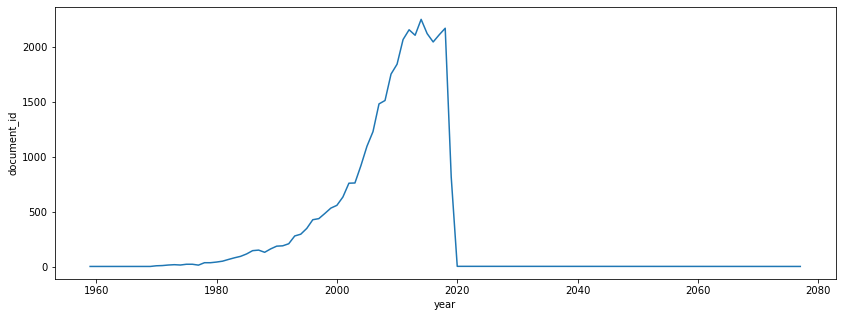

In [34]:
#Line chart of the number of publications per year
pubs_by_year = publications.groupby("year")[["document_id"]].count()
fig, ax = plt.subplots(figsize=(14,5))
sns.lineplot(data= pubs_by_year, x="year", y="document_id")

# Intermediate results

* Numeric results
    * How many publications of each researcher are in the data? Is this the same number than the column ``document-count``?
    * How many authors have each publication?
    * What is the average number of authors in a publication?
    * What is the average number of pages in a publication depending of the publication type?
    * What is the average number of citations in a publication depending of the publication type?
    * How many years each researcher have been active? (difference between the publicationDate of the oldest and newest publications)
* Graphic results
    * Histogram of the number of researchers by the number of active years
    * Histogram of the number of authors in a publication
    * Scatter plot of the publication year vs the number of citations
    * Chart of the average number of citations depending on the publication type
    * Chart of the average number of pages depending on the publication type


In [35]:
#How many publications of each researcher are in the data? Is this the same number than the column publications?
data.groupby("auth_id")["document_id"].count()

auth_id
6503848928     2
6503890565     3
6503896634     6
6503903714     1
6503939551     1
              ..
57208623083    1
57208639475    1
57208670663    1
57208685753    1
57208701829    1
Name: document_id, Length: 5807, dtype: int64

In [36]:
researchers[["auth_id", "publications"]].sort_values(by="auth_id")

,auth_id,publications
3435,6503848928,2
2346,6503890565,4
1874,6503896634,6
6043,6503903714,1
6754,6503908970,0
...,...,...
6820,57208685753,1
6579,57208701829,1
6837,57208702302,1
6407,57208702888,2


In [37]:
#How many authors have each publication?

publications[publications.authors.notna()].authors.apply(len)

0         8
1         5
2         5
3         5
4         5
         ..
35959     6
35960    15
35961     2
35962     2
35963     4
Name: authors, Length: 35038, dtype: int64

In [38]:
#What is the average number of authors in a publication?
def n_authors(x):
    if x:
        return len(x)
    else:
        return 0
publications.authors.apply(n_authors).mean()

5.262369457284712

In [39]:
publications[publications.authors.notna()].authors.apply(len).mean()

5.2635709800787716

In [40]:
#What is the average number of pages in a publication depending of the publication type?
publications.groupby("type")[["pages"]].mean()


,pages
type,
Article,9.816042
Article in Press,2.178571
Book,45.920000
Chapter,20.288110
Conference Paper,5.825166
Editorial,1.083636
Erratum,0.253012
Letter,2.565217
Note,3.909091


In [41]:
#What is the average number of citations in a publication depending of the publication type?
data.groupby("type")[["citations"]].mean()

,citations
type,
Article,944.058511
Article in Press,510.023669
Book,623.355556
Chapter,770.806542
Conference Paper,766.296809
Editorial,1467.633441
Erratum,991.867188
Letter,1097.894737
Note,917.300000


In [42]:
#How many years each researcher have been active? (difference between the publicationDate of the oldest and newest publications)
max_date = data.groupby("auth_id")["date"].max()
min_date = data.groupby("auth_id")["date"].min()

(max_date - min_date).dt.total_seconds()/(3600*24*365)


auth_id
6503848928      3.583562
6503890565     30.687671
6503896634     12.008219
6503903714      0.000000
6503939551      0.000000
                 ...    
57208623083     0.000000
57208639475     0.000000
57208670663     0.000000
57208685753     0.000000
57208701829     0.000000
Name: date, Length: 5807, dtype: float64

<AxesSubplot:xlabel='date', ylabel='Count'>

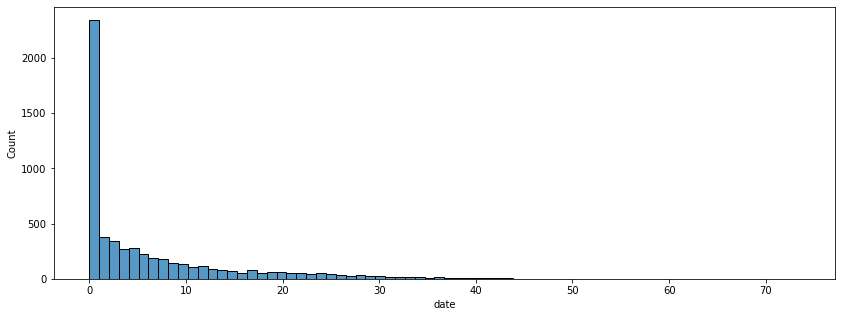

In [43]:
#Histogram of the number of researchers by the number of active years

max_date = data.groupby("auth_id")["date"].max()
min_date = data.groupby("auth_id")["date"].min()

(max_date - min_date).dt.total_seconds()/(3600*24*365)

fig, ax = plt.subplots(figsize=(14,5))

sns.histplot((max_date - min_date).dt.total_seconds()/(3600*24*365))



<AxesSubplot:xlabel='authors', ylabel='Count'>

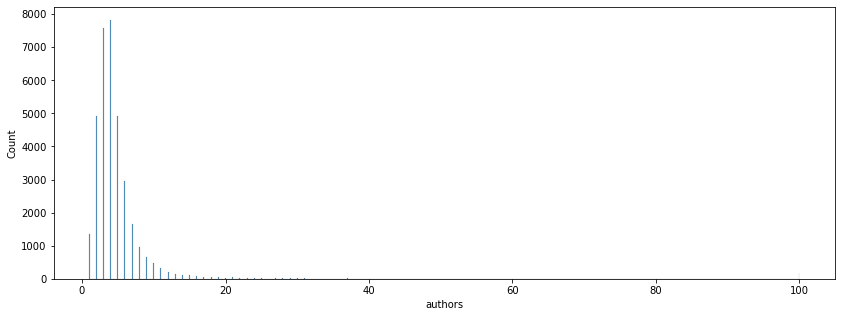

In [44]:
#Histogram of the number of authors in a publication

fig, ax = plt.subplots(figsize=(14,5))

sns.histplot(publications[publications.authors.notna()].authors.apply(len))

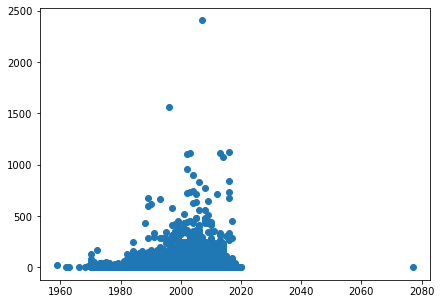

In [45]:
#Scatter plot of the publication year vs the number of citations
fig, ax = plt.subplots(figsize=(7,5))

# Plot
ax.scatter(publications.year, publications.cited_count) 

plt.show(fig)

<BarContainer object of 11 artists>

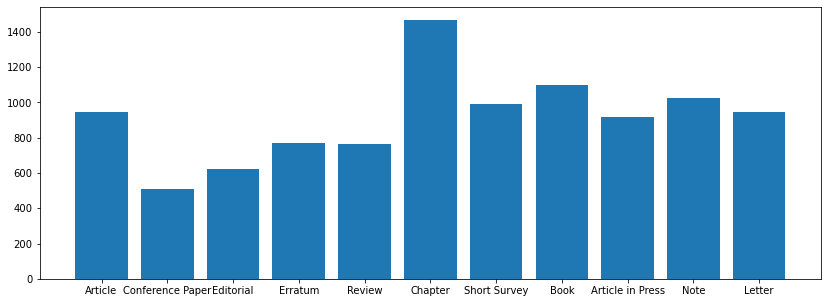

In [46]:
#Chart of the average number of citations depending on the publication type
ty = publications.type.unique()[:11]
p = data.groupby("type")["citations"].mean()
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(ty, p)

<BarContainer object of 11 artists>

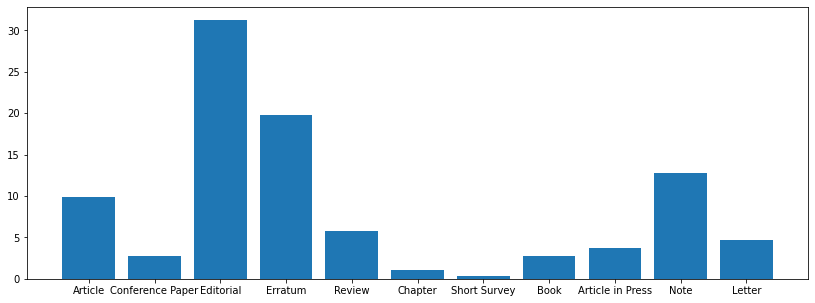

In [47]:
#Chart of the average number of pages depending on the publication type
ty = publications.type.unique()[:11]
p = data.groupby("type")["pages"].mean()
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(ty, p)

## Advanced results

* Title Analysis
    * What are the most repeated words in the publication titles?
    * Plot the distribution of the number of words in the titles

* Coauthor: 
    One researcher is coatuhor with other if both appears as author in at least one publication. 
    * What is the average number of different coauthors of each researcher?
    * How is the most frequent coauthor (their id) of each researcher?


* H-index: 
    The h-index (https://en.wikipedia.org/wiki/H-index) is a metric that tries to describe the impact of a researcher based on the number of citations received in each publication. A researcher has a h-index of `n` if she has at least `n` publications with `n` or more citations.

    * What is the h-index of each researcher?
    * Chart of the publications and number of citations of a certain researcher, highlinting (in a different color) which publications contributed to the h-index

![alt text](img/h-index.svg "H-Index")


In [48]:
publications_sample = publications.iloc[:5]

In [49]:
publications_sample.explode("authors")

,pages,authors,title,document_id,date,journal,openaccess,cited_count,type,year
0,15,57204955584,High-Efficiency High-Bandwidth Four-Quadrant F...,85058136304,2019-06-01,IEEE Journal of Emerging and Selected Topics i...,False,0,Article,2019.0
0,15,57200520067,High-Efficiency High-Bandwidth Four-Quadrant F...,85058136304,2019-06-01,IEEE Journal of Emerging and Selected Topics i...,False,0,Article,2019.0
0,15,24922369500,High-Efficiency High-Bandwidth Four-Quadrant F...,85058136304,2019-06-01,IEEE Journal of Emerging and Selected Topics i...,False,0,Article,2019.0
0,15,24438258500,High-Efficiency High-Bandwidth Four-Quadrant F...,85058136304,2019-06-01,IEEE Journal of Emerging and Selected Topics i...,False,0,Article,2019.0
0,15,56249124100,High-Efficiency High-Bandwidth Four-Quadrant F...,85058136304,2019-06-01,IEEE Journal of Emerging and Selected Topics i...,False,0,Article,2019.0
0,15,57204949147,High-Efficiency High-Bandwidth Four-Quadrant F...,85058136304,2019-06-01,IEEE Journal of Emerging and Selected Topics i...,False,0,Article,2019.0
0,15,57204954987,High-Efficiency High-Bandwidth Four-Quadrant F...,85058136304,2019-06-01,IEEE Journal of Emerging and Selected Topics i...,False,0,Article,2019.0
0,15,7005227142,High-Efficiency High-Bandwidth Four-Quadrant F...,85058136304,2019-06-01,IEEE Journal of Emerging and Selected Topics i...,False,0,Article,2019.0
1,8,7005227142,Energy-Buffered Single-Phase Inverter Operatin...,85060314395,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,2,Conference Paper,2018.0
1,8,57200519327,Energy-Buffered Single-Phase Inverter Operatin...,85060314395,2018-12-03,2018 IEEE Energy Conversion Congress and Expos...,False,2,Conference Paper,2018.0


In [50]:
#What are the most repeated words in the publication titles?
def split_words(x):
    return x.split(" ")
publications["title_words"] = publications.title.apply(split_words)
publications.explode("title_words").groupby("title_words")[["document_id"]].count().sort_values(by="document_id")

,document_id
title_words,
"""",1
optica,1
Threatened,1
"optical,",1
Thr<sup>172</sup>-AMPKα,1
...,...
for,9702
the,11908
in,13030


<AxesSubplot:xlabel='n_words'>

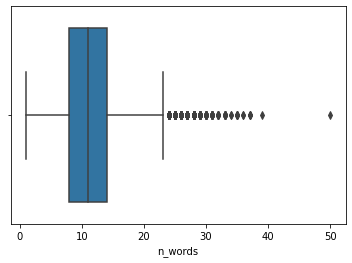

In [51]:
#Plot the distribution of the number of words in the titles
publications["n_words"] = publications.title_words.apply(len)
sns.boxplot(data=publications, x="n_words")